In [43]:
%pylab nbagg 
n = 50
c = 1.
pencil = linspace(-c/2.,c/2.,n)


Populating the interactive namespace from numpy and matplotlib


In [5]:
pencil

array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ])

In [44]:
upper = 0.5*ones(n)
lower = -0.5 + zeros(n)

In [8]:
upper

array([ 0.5,  0.5,  0.5,  0.5,  0.5])

In [45]:
line = array([pencil,lower,upper])

In [10]:
line

array([[-0.5 , -0.25,  0.  ,  0.25,  0.5 ],
       [-0.5 , -0.5 , -0.5 , -0.5 , -0.5 ],
       [ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ]])

In [14]:
line.ravel(order='F')

array([-0.5 , -0.5 ,  0.5 , -0.25, -0.5 ,  0.5 ,  0.  , -0.5 ,  0.5 ,
        0.25, -0.5 ,  0.5 ,  0.5 , -0.5 ,  0.5 ])

In [16]:
one_edge = reshape(line.ravel(order='F'),(n,3))

In [18]:
import itertools as itt

In [22]:
q = ['p','u','l']
for thing in itt.combinations(q,2):
    print(thing)

('p', 'u')
('p', 'l')
('u', 'l')


In [20]:
itt.combinations?

In [23]:
cube_edges = []
r=['u','l']
for j in r:
    for k in r:
        cube_edges.append(['p',j,k])

In [24]:
cube_edges

[['p', 'u', 'u'], ['p', 'u', 'l'], ['p', 'l', 'u'], ['p', 'l', 'l']]

In [25]:
for this in cube_edges:
    for i in [1,2]:
        print(roll(array(this),i))

['u' 'p' 'u']
['u' 'u' 'p']
['l' 'p' 'u']
['u' 'l' 'p']
['u' 'p' 'l']
['l' 'u' 'p']
['l' 'p' 'l']
['l' 'l' 'p']


In [46]:
cube_sides = []
r=[upper,lower]
for j in r:
    for k in r:
        cube_sides.append([pencil,j,k])

In [27]:
cube_sides

[[array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ]),
  array([ 0.5,  0.5,  0.5,  0.5,  0.5]),
  array([ 0.5,  0.5,  0.5,  0.5,  0.5])],
 [array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ]),
  array([ 0.5,  0.5,  0.5,  0.5,  0.5]),
  array([-0.5, -0.5, -0.5, -0.5, -0.5])],
 [array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ]),
  array([-0.5, -0.5, -0.5, -0.5, -0.5]),
  array([ 0.5,  0.5,  0.5,  0.5,  0.5])],
 [array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ]),
  array([-0.5, -0.5, -0.5, -0.5, -0.5]),
  array([-0.5, -0.5, -0.5, -0.5, -0.5])]]

In [47]:
other_cube_sides=[]
for this in cube_sides:
    for i in [1,2]:
        other_cube_sides.append(roll(array(this),i,axis=0))

In [29]:
other_cube_sides

[array([[ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ],
        [-0.5 , -0.25,  0.  ,  0.25,  0.5 ],
        [ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ]]),
 array([[ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ],
        [ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ],
        [-0.5 , -0.25,  0.  ,  0.25,  0.5 ]]),
 array([[-0.5 , -0.5 , -0.5 , -0.5 , -0.5 ],
        [-0.5 , -0.25,  0.  ,  0.25,  0.5 ],
        [ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ]]),
 array([[ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ],
        [-0.5 , -0.5 , -0.5 , -0.5 , -0.5 ],
        [-0.5 , -0.25,  0.  ,  0.25,  0.5 ]]),
 array([[ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ],
        [-0.5 , -0.25,  0.  ,  0.25,  0.5 ],
        [-0.5 , -0.5 , -0.5 , -0.5 , -0.5 ]]),
 array([[-0.5 , -0.5 , -0.5 , -0.5 , -0.5 ],
        [ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ],
        [-0.5 , -0.25,  0.  ,  0.25,  0.5 ]]),
 array([[-0.5 , -0.5 , -0.5 , -0.5 , -0.5 ],
        [-0.5 , -0.25,  0.  ,  0.25,  0.5 ],
        [-0.5 , -0.5 , -0.5 , -0.5 , -0.5 ]]),
 array([[-0.5 , -0.5 , -0.5 , -0.5 , -0.5

In [48]:
cube_sides_points = []
for this in cube_sides+other_cube_sides:
    cube_sides_points.append(reshape(array(this).ravel(order='F'),(n,3)))

In [49]:
len(cube_sides_points[1])

50

In [33]:
cube_sides_points

[array([[-0.5 ,  0.5 ,  0.5 ],
        [-0.25,  0.5 ,  0.5 ],
        [ 0.  ,  0.5 ,  0.5 ],
        [ 0.25,  0.5 ,  0.5 ],
        [ 0.5 ,  0.5 ,  0.5 ]]), array([[-0.5 ,  0.5 , -0.5 ],
        [-0.25,  0.5 , -0.5 ],
        [ 0.  ,  0.5 , -0.5 ],
        [ 0.25,  0.5 , -0.5 ],
        [ 0.5 ,  0.5 , -0.5 ]]), array([[-0.5 , -0.5 ,  0.5 ],
        [-0.25, -0.5 ,  0.5 ],
        [ 0.  , -0.5 ,  0.5 ],
        [ 0.25, -0.5 ,  0.5 ],
        [ 0.5 , -0.5 ,  0.5 ]]), array([[-0.5 , -0.5 , -0.5 ],
        [-0.25, -0.5 , -0.5 ],
        [ 0.  , -0.5 , -0.5 ],
        [ 0.25, -0.5 , -0.5 ],
        [ 0.5 , -0.5 , -0.5 ]]), array([[ 0.5 , -0.5 ,  0.5 ],
        [ 0.5 , -0.25,  0.5 ],
        [ 0.5 ,  0.  ,  0.5 ],
        [ 0.5 ,  0.25,  0.5 ],
        [ 0.5 ,  0.5 ,  0.5 ]]), array([[ 0.5 ,  0.5 , -0.5 ],
        [ 0.5 ,  0.5 , -0.25],
        [ 0.5 ,  0.5 ,  0.  ],
        [ 0.5 ,  0.5 ,  0.25],
        [ 0.5 ,  0.5 ,  0.5 ]]), array([[-0.5 , -0.5 ,  0.5 ],
        [-0.5 , -0.25,  0.5 ],
  

In [34]:
%pylab nbagg
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


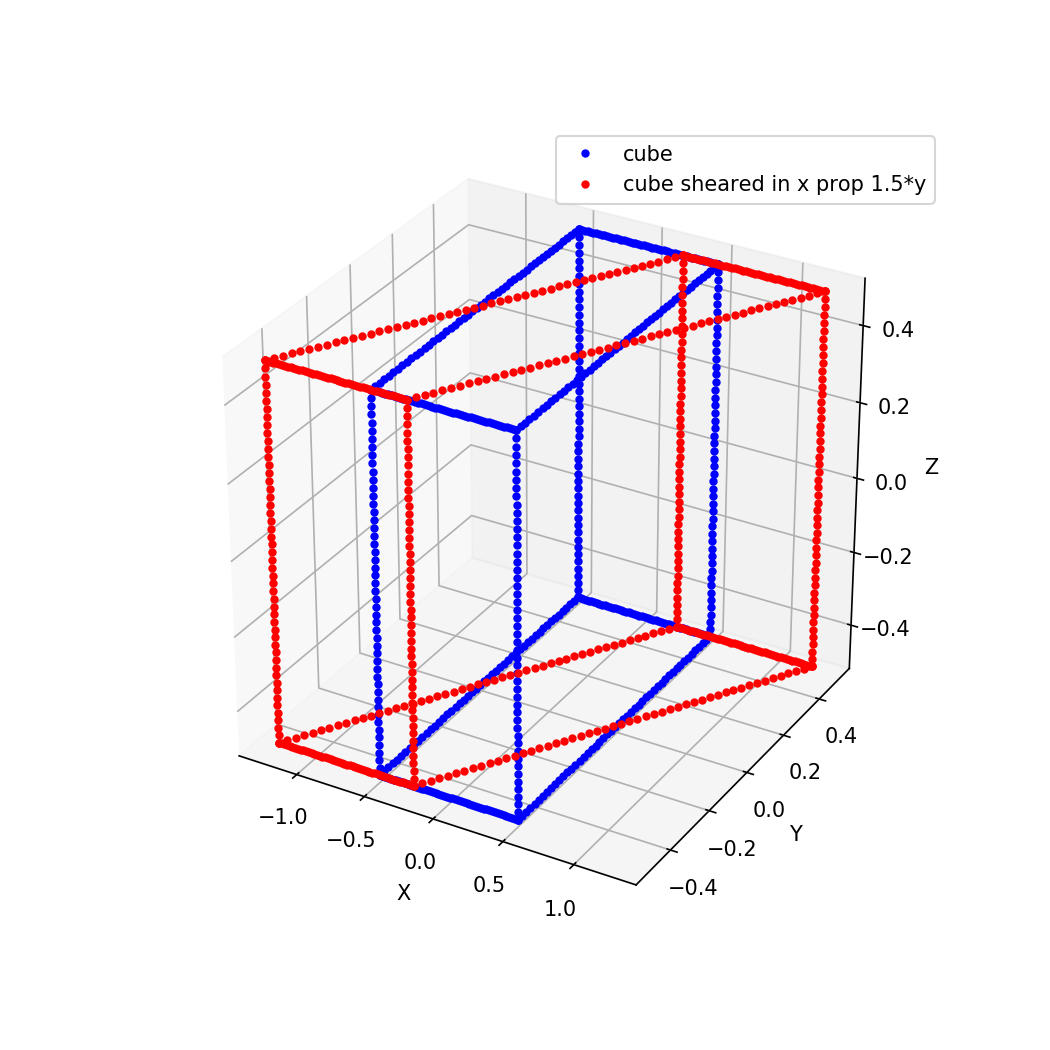

In [57]:
close(7) 
fig = figure(figsize=(7,7))

In [50]:
cube_vecs = reshape(array(cube_sides_points),(12*n,3))

In [51]:
len(cube_vecs)

600

In [38]:
def transp(points):
    return array(points).T[0], array(points).T[1], array(points).T[2]

In [52]:
x, y, z = transp(cube_vecs)

In [54]:
y

array([ 0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5 

In [61]:
this_label='cube'
this_label='cube sheared in x prop 1.5*y'
ax = fig.gca(projection='3d')
ax.plot(x, y, z, '.r',label=this_label)
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [59]:
sy = 1.5
T1 = matrix([[1,sy,0],[0,1,0],[0,0,1],])

In [60]:
vecs = cube_vecs
T = T1
# transformation:
trans_vec = []
for i in range(len(vecs)):
    this_tv = T.dot(vecs[i]).A1
    trans_vec.append(this_tv)

# transpose to make plotable arrays
x, y, z = transp(trans_vec)